## Deep Computer Vision

In this guide we will learn how to perform image classification and object detection/recognition using deep computer vision with something called a **convolution neural network.**

The goal of our convolution neural networks will be to classify and detect images or specific objects from the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concept.

* Image Data
* Convolutional Layer
* Pooling Layer
* CNN Architectures

The major difference we are about to see in these types of neural networks are the layers that make them up.

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and split dataset
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()

# Normalize pixel values to between 0 and 1
train_data, test_data = train_data/255.0, test_data/255.0

class_names = ["airplane", 'automobile', "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

170498071/170498071 [==============================] - 18s 0us/step


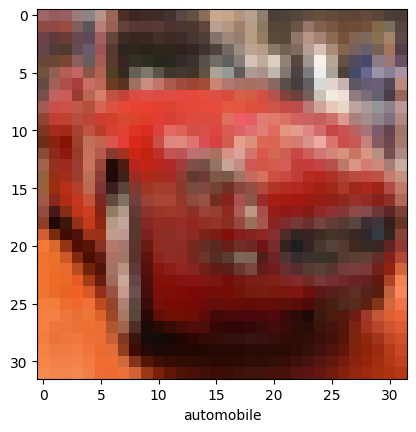

In [7]:
img_index = 5

plt.imshow(train_data[img_index], cmap = plt.cm.binary)
plt.xlabel(class_names[train_label[img_index][0]])
plt.show()

## CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32, 32, 3)))
# In the fist input layers we need to fill many thing above and this is what is that mean
# layers.Conv2D(32, (3,3) -> 32 mean to we amount of filter is 32, (3,3) mean size of filter is 3x3
# activation = "relu" -> determine the activation function
# input_shape = (32, 32, 3) -> This mean our input size is 32x32 with 3 color channel(RGB).

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))

In [15]:
model.summary()
# Meaning of summary
# Output Shape (None, 30, 30, 32) -> (30,30) mean after conv2d_1 layer our input is going to be (30,30)
#                                    Because we create model without padding so we will lost 1 row and 1 column
#                                    so we can't apply filter to the edge pixel.
#                                    32 means we are using 32 amount of filter

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

## Adding Dense Layers

So far we have just completed the **convolutional base**. Now we need to take these extracted featres and add a way to calssify them. This is why we add the following layers to our model.

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

## Training 

Now we will train and compile the model using the recommend hyper parameters from tensorflow.

In [18]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

history = model.fit(train_data, train_label, epochs = 10,
                    validation_data = (test_data, test_label))

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5029 - accuracy: 0.4540 - val_loss: 1.2759 - val_accuracy: 0.5408
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1517 - accuracy: 0.5930 - val_loss: 1.1981 - val_accuracy: 0.5768
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9969 - accuracy: 0.6511 - val_loss: 0.9484 - val_accuracy: 0.6694
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8999 - accuracy: 0.6839 - val_loss: 0.9023 - val_accuracy: 0.6898
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8262 - accuracy: 0.7114 - val_loss: 0.8818 - val_accuracy: 0.6979
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7639 - accuracy: 0.7333 - val_loss: 0.8998 - val_accuracy: 0.6866
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7173 - accuracy: 0.7487 - val_loss: 0.8603 - val_ac

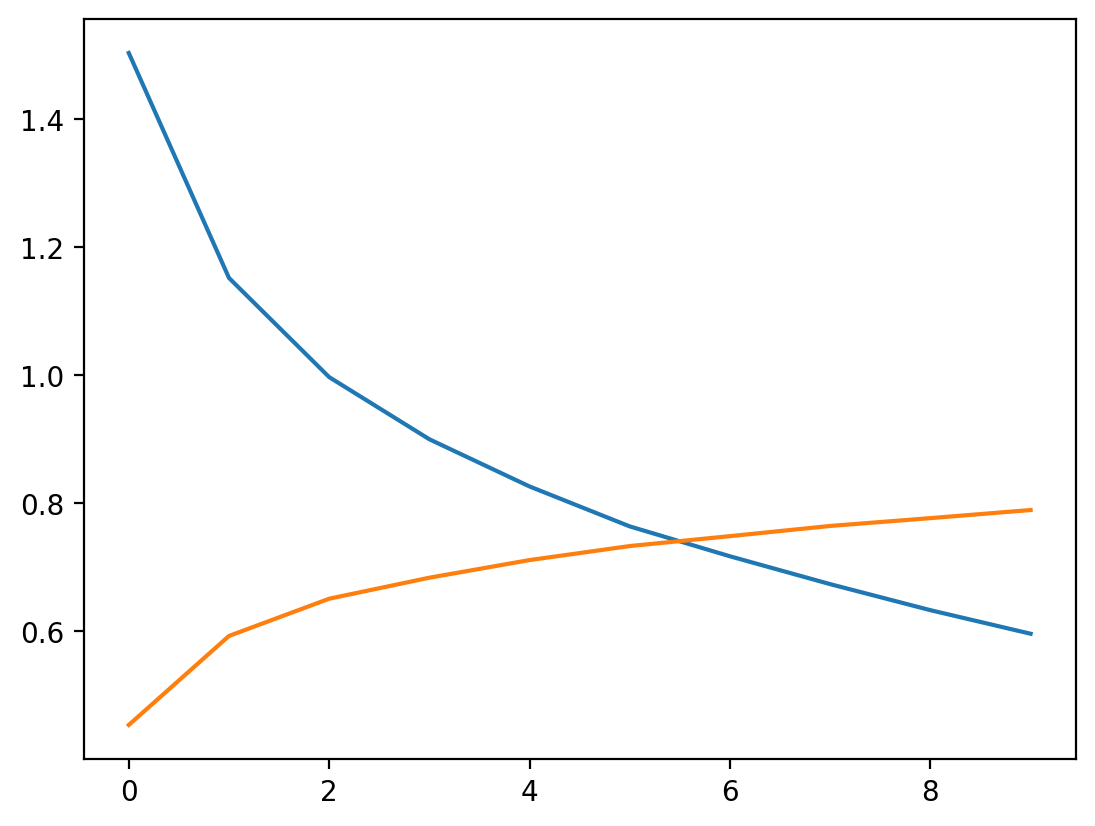

In [19]:
fig = plt.figure(dpi = 200)
plt.plot(range(10), history.history["loss"]);
plt.plot(range(10), history.history["accuracy"]);

## Evaluating the Model

We can determine how well the model performed by looking at it's performance on the test data set.

In [27]:
test_loss, test_acc = model.evaluate(test_data, test_label, verbose = 2)
print("Accuracy is {:.2f}%".format(test_acc * 100))

313/313 - 1s - loss: 0.9159 - accuracy: 0.7009 - 732ms/epoch - 2ms/step
Accuracy is 70.09%


## Data Augmentation

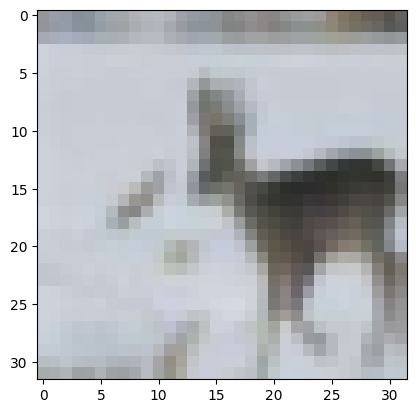

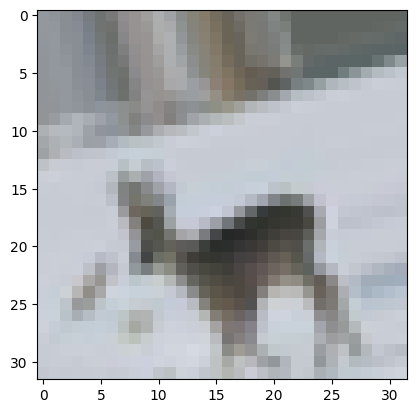

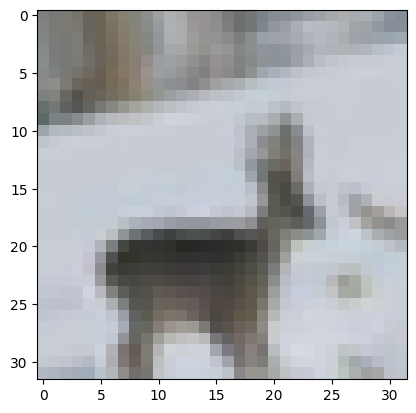

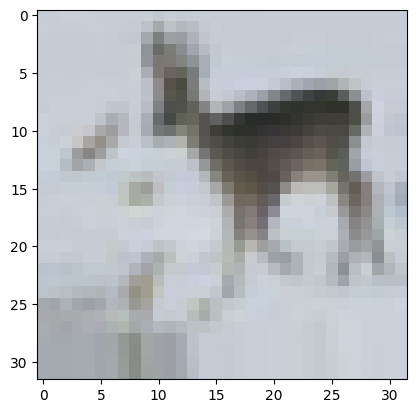

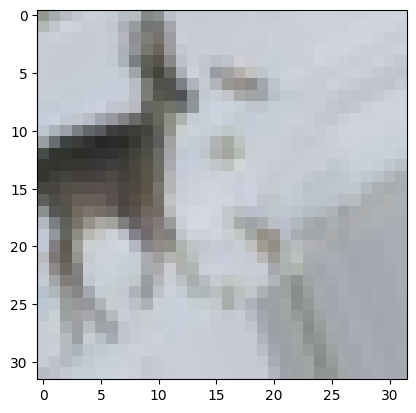

In [34]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_data[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()